# Anomaly Detection HW - (Un)supervised Learning
#### Created by: Shaul Solomon

In this homework, we will try to explore ways to explore a "mostly" unlabeled dataset *within* a larger problem space.

### Motivation

You are a new data scientist joining a DS team that has already been working on a classification problem for a few weeks.

The dataset is coming from a field in which you have no background experience, and the other people on your team are worrisome of someone new joining their project.

Here is what you know so far:
1. The project is a classification problem to detect if a new instance belongs to one of 15 classes. However there is noise in the dataset and bad cases need to labeled and filtered out.
2. The company found a dude on Fiverr who said he was a domain expert and would charge only 5 cents per label (though he would only accept it in Bitcoin). After the project was done, the DS team discovered there was noise in the labeling, but by that time, Mr. Fiverr skipped town, burnt his fingerprints, and apparently was starting a new EFT startup ([Jesus Toast NFT](https://opensea.io/assets/ethereum/0x495f947276749ce646f68ac8c248420045cb7b5e/29379836586482566762011168218144394594657388904534917765071502304442530660353))in the Bahamas.
3. The company hired a Chilean startup to label the data, but it is very expensive and slow, and due to conflict in the region, the labeling has stopped. They have properly labeled all of the test data and around a quarter of the train dataset.
4. Your DS Team spent a lot of work on the classification model, and don't want you to change anything at all.

### Your Objective

In this homework, you will try three different methods, supervised and unsupervised, to try and filter out noisy obs from the dataset, in order to improve the classification model (Evaluation Metric - weighted F1 score).

You have been given clear instructions that you **can not**:
1. Change the features in the dataset (no feature selection or feature engineering).
2. Change anything w.r.t to the Classification model (RF Classifier) - not even the hyperparameters.

Beyond the homework itself, try your hand to see how good you can get the model simply by filtering out noise (in a sandbox with all the noise filtered - the model can theoretically get up to a F1 score of 98%).

Good Luck!

### Imports

In [198]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from collections import Counter
from sklearn.cluster import KMeans, DBSCAN

In [170]:
### Ignore all warnings - uncomment this out if you'd like not to see the warnings ###
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


### Immutable Code

In [3]:
#### Immutable Code
class RFModel_544():
    def __init__(self, train_data, test_data, label = 'Class') -> None:
        self.model = None
        self.label = label

        self.train_data = train_data.copy()
        self.test_data = test_data.copy()

        if 'Corrupted' in self.train_data.columns:
            self.train_data = self.train_data.drop('Corrupted', axis=1)        

    def fit(self):
        y_train = self.train_data[self.label]
        X_train = self.train_data.drop(self.label, axis=1)
    
        self.clf = RandomForestClassifier(random_state=44, n_estimators=5, max_depth=3)
        self.clf.fit(X_train, y_train)
        return self
    
    def predict(self):
        X_test = self.test_data.drop(self.label, axis=1)
        y_pred = self.clf.predict(X_test)
        return y_pred
    
    def evaluate(self):
        y_test = self.test_data[self.label].values
        y_pred = self.predict()
        f1 = f1_score(y_test, y_pred, average='weighted')
        return f1

In [4]:
def run_classification_544(train_data, test_data, label = 'Class', return_f1_score = False):
    model = RFModel_544(train_data, test_data, label)
    model.fit()
    f1 = model.evaluate()
    if return_f1_score:
        return np.round(f1*100,2)
    else:
        print(f'F1 Score (weighted): {np.round(f1*100,2)}%')

### Import Data

In [6]:
train_data = pd.read_csv('ad_data/train_data.csv', index_col=0)
test_data = pd.read_csv('ad_data/test_data.csv', index_col=0)

In [7]:
train_data.head(3)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Class,Corrupted
0,-4.442740,3.509633,-2.595045,5.625753,5.241519,-3.391638,-0.161169,-2.479898,4.678951,-0.096087,...,-1.322623,4.709249,0.870410,1.292379,1.001019,2.828160,3.314469,-2.083216,8,NaN
1,-4.913701,-3.472922,-0.711968,3.605206,-2.977909,-2.479564,1.661866,5.808457,3.522298,-5.740412,...,-3.559130,5.701702,-6.776739,4.780978,0.958094,-2.798584,-1.367130,0.887345,9,NaN
2,0.745200,2.064658,1.635380,-2.599492,-5.820311,-5.141749,0.626823,-0.901922,3.417227,4.113865,...,4.756362,1.337834,3.691216,1.652381,-3.740889,-2.653817,-3.550755,-1.934451,1,NaN


### Step 0 - Establish Baseline

In [8]:
run_classification_544(train_data, test_data, label='Class')

F1 Score (weighted): 88.3%


### Step 1 - EDA

There are two questions here just to make sure you understand the particulars of this dataset, but we recommend you do as much EDA as you want/need.

#### Q1.1 (2 points):
First, visualise the distribution of labels within train/test set.
1. Are there imbalances?
2. Are there any labels that don't exist within the test set?

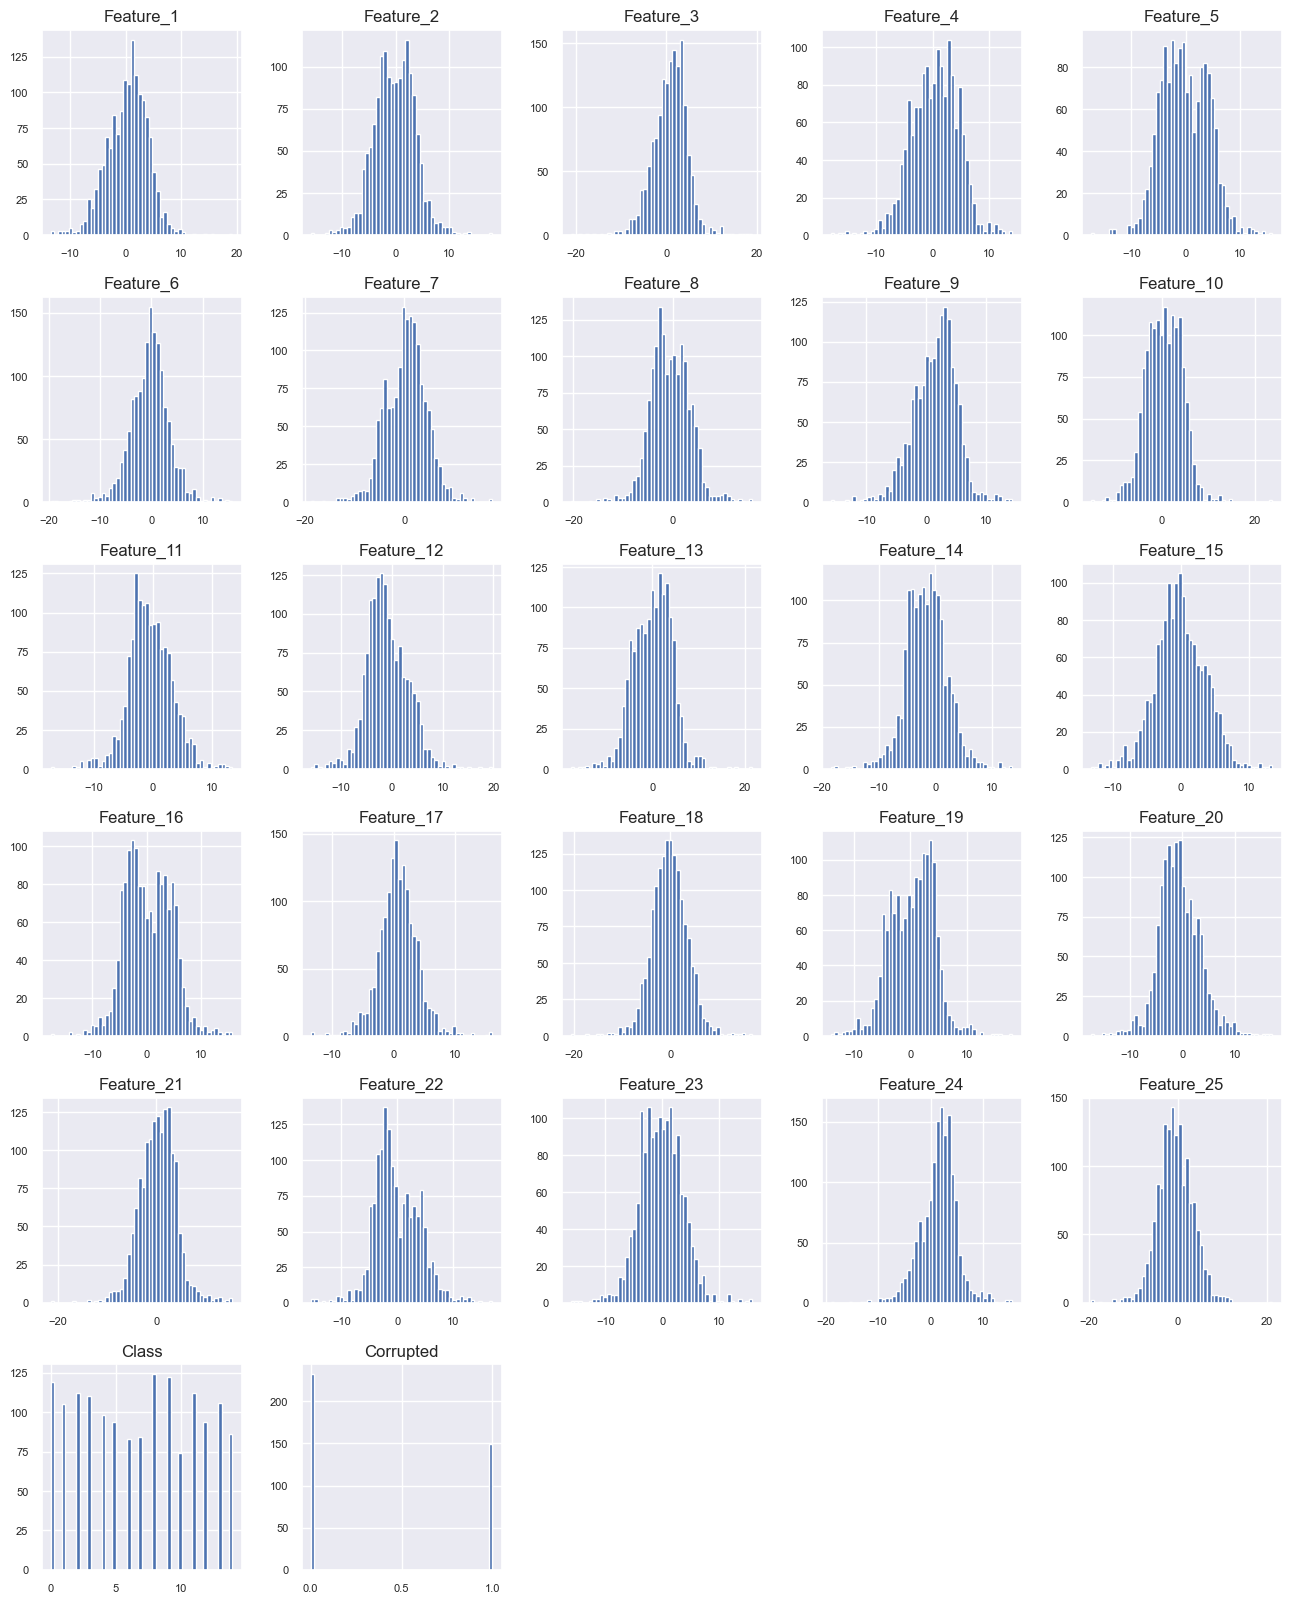

<Figure size 640x480 with 0 Axes>

In [60]:
## Insert Code here
train_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
sns.set_theme()
plt.figure()
plt.show()




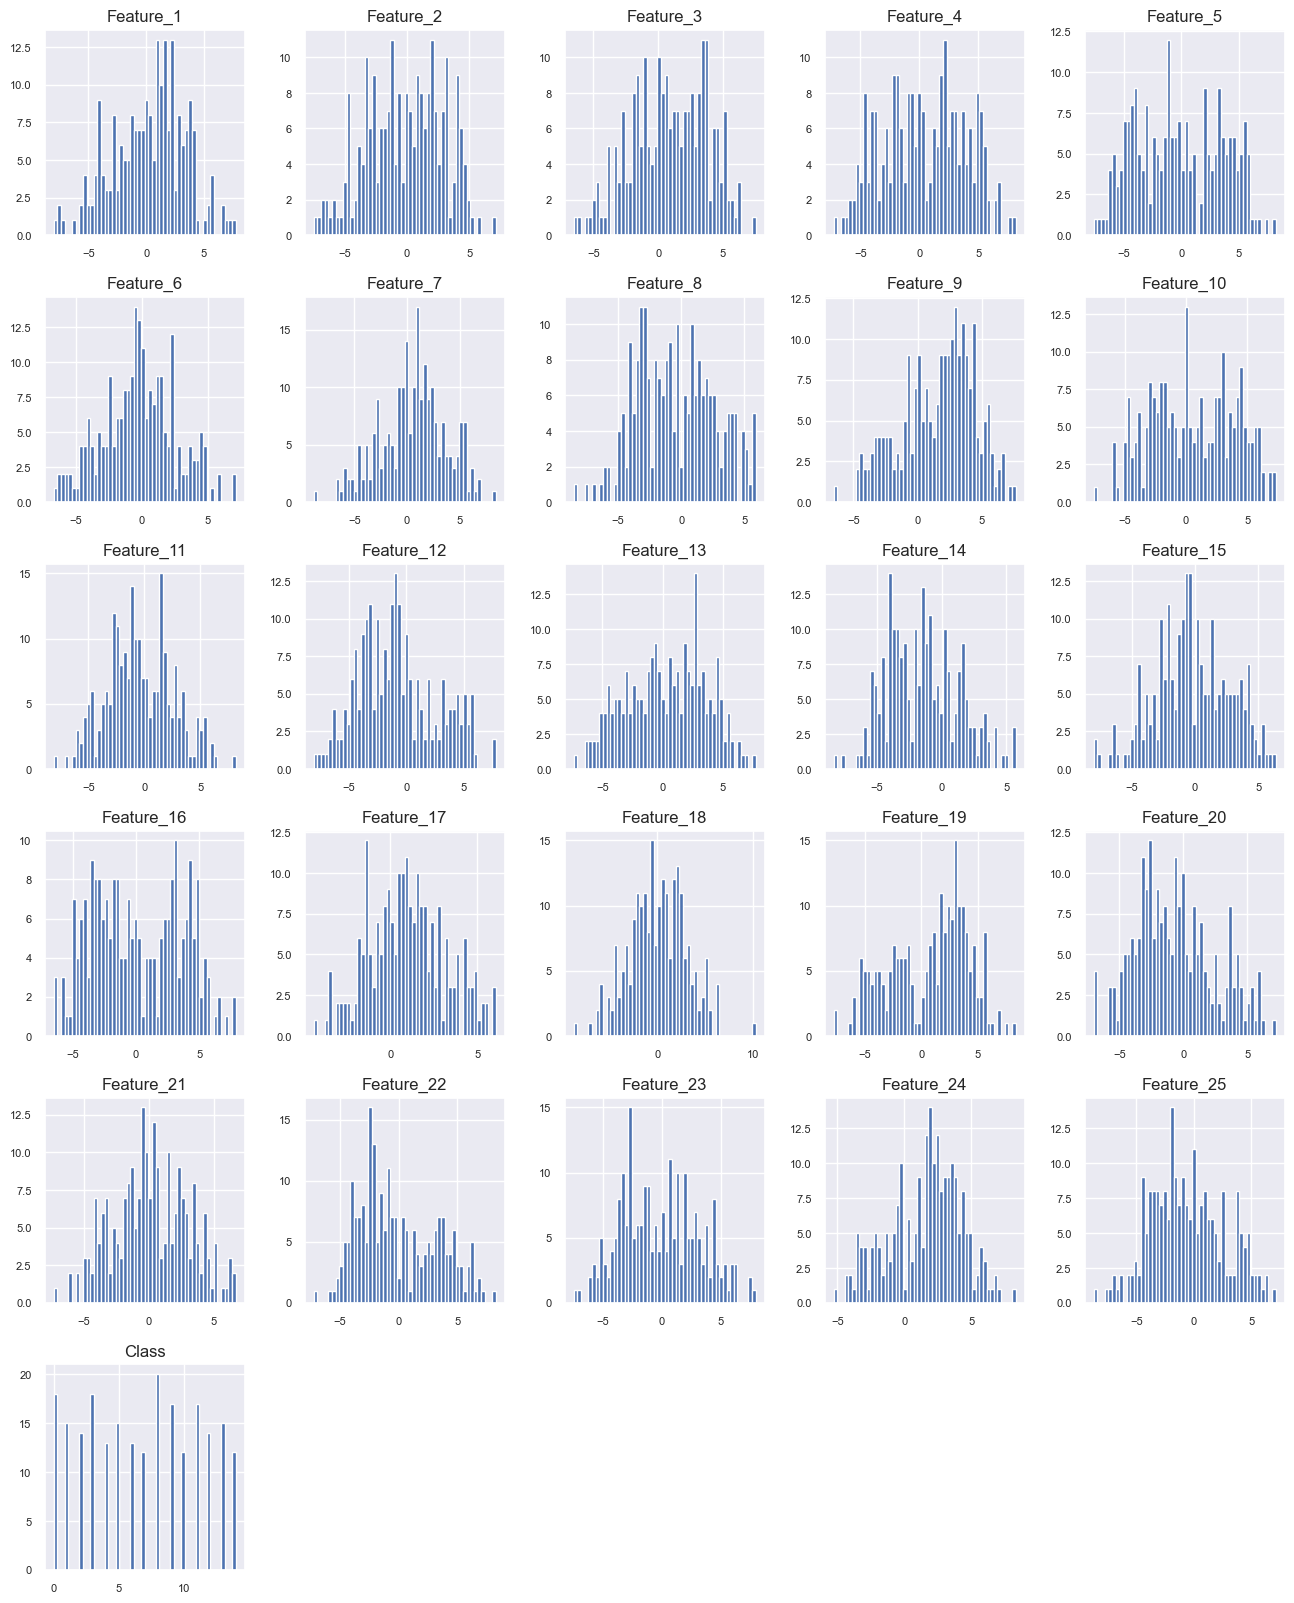

In [59]:
test_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

plt.show()

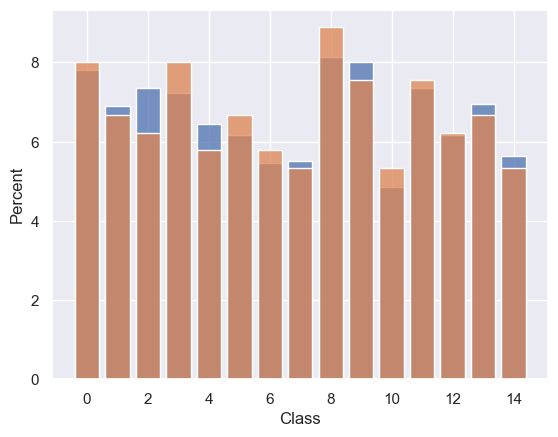

In [171]:


sns.histplot(data=train_data['Class'], stat='percent', bins=15, discrete=True, shrink=.8)
sns.histplot(data=test_data['Class'], stat='percent', bins=15, discrete=True, shrink=.8)

plt.show()

#### Q1.2 (2 points):
Look at the labeled data within the train set:
1. What percentage of the data has labels?
2. How is it divided between classes?

Percentage of labeled data = 25.02% 



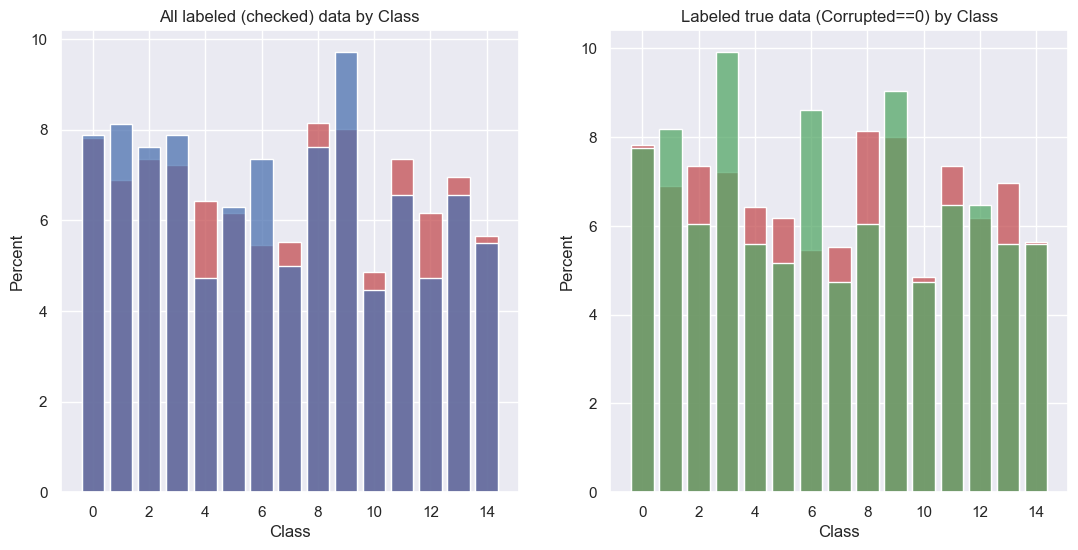

In [188]:
### Insert Code Here
labeled_train_data = train_data.dropna()
perc_labels = len(labeled_train_data)/len(train_data)
print('Percentage of labeled data = {:.2%} \n'.format(perc_labels))
#sns.histplot(data=train_data['Class'], stat='percent', bins=15, discrete=True, shrink=.8)
#sns.histplot(data=test_data['Class'], stat='percent', bins=15, discrete=True, shrink=.8)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_data['Class'], stat='percent', bins=15, discrete=True, shrink=.8,color='r')
sns.histplot(data=labeled_train_data['Class'], stat='percent', bins=15, discrete=True, shrink=.8)
ax1.set_title('All labeled (checked) data by Class')


plt.subplot(1, 2, 2)
sns.histplot(data=train_data['Class'], stat='percent', bins=15, discrete=True, shrink=.8,color='r')
sns.histplot(data=labeled_train_data[labeled_train_data['Corrupted']==0]['Class'], stat='percent', bins=15, discrete=True, shrink=.8, color='g')
ax2.set_title('Labeled true data (Corrupted==0) by Class')

plt.show()

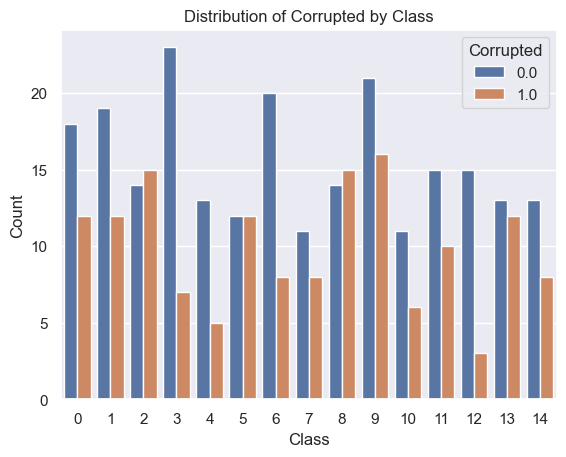

In [174]:
cor_labeled_train_data = labeled_train_data.groupby(['Class', 'Corrupted']).size().reset_index(name='Count')
cor_labeled_train_data['Class'] = cor_labeled_train_data['Class'].astype(str)
cor_labeled_train_data['Corrupted'] = cor_labeled_train_data['Corrupted'].astype(str)

sns.barplot(data=cor_labeled_train_data, x='Class', y='Count', hue='Corrupted')

plt.title('Distribution of Corrupted by Class')
plt.show()


#### Q1.3 (1 point):
Can we assume that this sample labeled dataset represents the true ratio of corrupted/not_corrupted within the larger data - why or why not - explain?

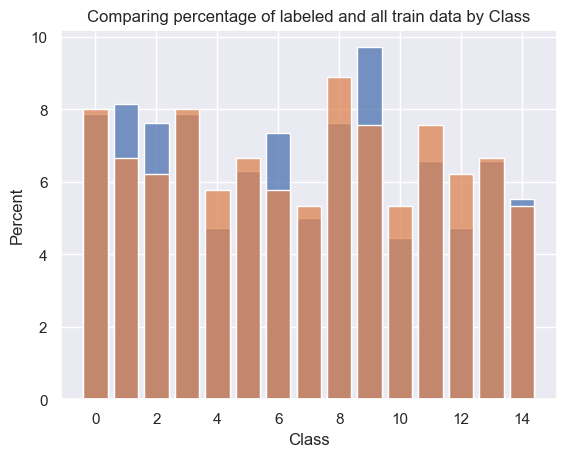

In [176]:
sns.histplot(data=labeled_train_data['Class'], stat='percent', bins=15, discrete=True, shrink=.8)
sns.histplot(data=test_data['Class'], stat='percent', bins=15, discrete=True, shrink=.8)

plt.title('Comparing percentage of labeled and all train data by Class')
plt.show()

### Step 2 - Supervised Learning

Even though we only have a subset of the data that has labels, perhaps it is enough to train a classifier to be able to distinguish between normal/corrupt instances?

#### Q2.1 (10 points)
Run a Proof of Concept (POC) - take only the cases where the data is labeled, and run a simple classifier (similar to the 544): <br> `model = RandomForestClassifier(random_state=44, n_estimators=5, max_depth=3)
` <br> see if we get a decent score on the classifier?

In [196]:
'''# Split and extract labels from train and test set
X_train_cor = labeled_train_data.drop(['Corrupted'], axis=1)
y_train_cor = labeled_train_data['Corrupted']
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']'''

In [218]:
# Extact column 'Corrupted' as labels
X_labeled, y_labeled = labeled_train_data.drop('Corrupted', axis=1), labeled_train_data['Corrupted']

# split to train and test
X_train_lab, X_test_lab, y_train_lab, y_test_lab = train_test_split(X_labeled, y_labeled, train_size=0.2, random_state=44)

# train and predict labels 'Corrupted'
model = RandomForestClassifier(random_state=44, n_estimators=5, max_depth=3)
model.fit(X_train_lab, y_train_lab)
y_pred_lab = model.predict(X_test_lab)

acc_lab = accuracy_score(y_test_lab, y_pred_lab)
f1_lab = f1_score(y_test_lab, y_pred_lab, average='weighted')
print(f'Accuracy in prediction Corrupted: {np.round(acc_lab*100,2)}%')
#print(f'F1 Score (weighted): {np.round(f1_lab*100,2)}%')

Accuracy in prediction Corrupted: 68.2%


#### Q2.2 (15 Points)
Now that you have (hopefully) proven the POC: <br>
1. Retrain the classifier on all of the labeled data.
2. Run it on the unlabeled data.
3. See how it affects `run_classification_544` - you need to beat the baseline!

In [221]:
### Insert Code Here
# set of unlabeled data (where 'Corrupted' == NaN) for prediction
unlabeled_train_data = train_data[train_data['Corrupted'].isna()].drop('Corrupted', axis=1)

# Retrain the classifier on all of the labeled data.
model.fit(X_labeled, y_labeled)

# Run it on the unlabeled data.
unlabeled_train_data['Corrupted'] = model.predict(unlabeled_train_data)

# form new train set
train_data_supervised = pd.concat([labeled_train_data, unlabeled_train_data])
train_data_supervised = train_data_supervised[train_data_supervised['Corrupted'] == 0]

In [222]:
run_classification_544(train_data_supervised, test_data, label='Class')

F1 Score (weighted): 90.54%


### Step 3 - Unsupervised method

While the supervised method was nice, perhaps we can beat it with using *all* the data to train an unsupervised method.

#### Q3.1 (10 points)
Use either IsolationForest or LocalOutlierFactor (or both) and train the model to predict outliers. <br>
The only hyper-parameter to play with at this stage is `contamination`. <br>
1. What is your default value for contamination and defend your initial hypothesis.
2. Look at the model's predictions - how much noise did it determine from the data? 
3. How well did the model do compared to the supervised/baseline? 

In [313]:
contamination_amount = 0.119

# Drop column 'Corrupted'
X_train_IF = train_data.drop('Corrupted', axis=1)


model_IForest = IsolationForest(random_state=0, contamination=contamination_amount).fit(X_train_IF)

X_train_IF['Corrupted'] = model_IForest.predict(X_train_IF)

# Look at the model's predictions - how much noise did it determine from the data? 
noise_perc = X_train_IF[X_train_IF['Corrupted'] < 0]['Corrupted'].abs().sum() / X_train_IF['Corrupted'].shape[0]
print(f'Model determines {np.round(noise_perc*100,2)}% of noise')

train_data_unsupervised = X_train_IF[X_train_IF['Corrupted'] == 1]

Model determines 11.95% of noise


In [312]:
run_classification_544(train_data_unsupervised, test_data, label='Class')

F1 Score (weighted): 85.89%


In [ ]:
### Insert Explanation Here

#### Q3.2 (15 points)
1. Iterate through various contamination levels - `np.linspace(0.05, 0.5, 10)` and plot the lineplot of the f1_score.
2. Explain the lineplot that you see - does it give you confidence?
3. Which contamination gave the best results - explain possibly why? 

In [ ]:
train_data_unsupervised_best = None
X_train_IF = train_data.drop('Corrupted', axis=1)

In [320]:
dict_f1 = {}
for contamination_amnt in np.linspace(0.05, 0.5, 10):
    model_IForest = IsolationForest(random_state=0, contamination=contamination_amnt).fit(X_train_IF)
    train_data_unsupervised = X_train_IF[model_IForest.predict(X_train_IF)==1]
    
    dict_f1[contamination_amnt] = run_classification_544(train_data_unsupervised, test_data, label='Class', return_f1_score = True)


### Get max F1 Score
max_f1 = max(dict_f1.values())
max_f1_contamination = [k for k, v in dict_f1.items() if v == max_f1][0]
print(f'Max F1 Score: {max_f1}% - Contamination: {max_f1_contamination}')

Max F1 Score: 86.13% - Contamination: 0.25


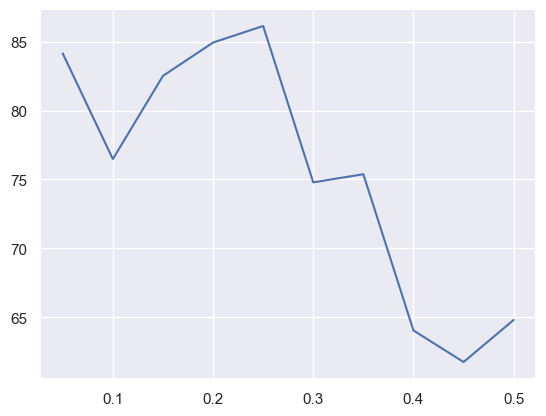

In [321]:
### elbow method
plt.plot(list(dict_f1.keys()), list(dict_f1.values()));

In [323]:
model_IForest = IsolationForest(random_state=0, contamination=0.25).fit(X_train_IF)
train_data_unsupervised_best = X_train_IF[model_IForest.predict(X_train_IF)==1]

In [324]:
run_classification_544(train_data_unsupervised_best, test_data, label='Class')

F1 Score (weighted): 86.13%


I expected the unsupervised to do better.
Perhaps what we should of done from the get-go is to visualise the data, both how the classes are spread out and their respective noise.

### Step 4 - Dimensionality Reduction (PCA)
#### Q4 (10 points)
1. Use PCA to visualise each of the data points and their respective.
2. What insight do we learn from the data that we can use to improve our models?

In [ ]:
def vis_PCA(df, label, shape):
    ### I recommend using plotly.express for this visualization
    pass

### Insert Code Here

In [ ]:
#### Insert Explanation Here

### Step 5 - Clustering per Class

Another classic method for anomaly detection is by looking at each class individually, using clustering methodologies (KMeans, KNN, DBScan, etc.) to determine what is the normal data and what is noise.
#### Q5.1 (15 points)
Train a simple KNN/Kmeans/DBscan that just determines for each class in and out class

#### Q5.2 (10 points) 
For whichever model you used, use the labeled data to use reasonable hyperparameters.

In [ ]:
train_data_clustering = None

### Insert Code Here

In [ ]:
run_classification_544(train_data_clustering, test_data, label='Class')

### Step 6 - Review

#### Q6.1 (5 points)
In this situation we knew that there was no noise in the test dataset - if we didn't know that - is there anything we would have done better? Explain?

In [ ]:
### Insert Explanation Here

#### Q6.2 (5 points)
If we chose to go with the unsupervised methods, what benefit could the labeling that did do help us?

In [ ]:
### Insert Explanation Here

### BONUS - GO WILD (10 points)
Choose any of the methods above and do what you go to do to get a weighted f1 score above 93%